In [ ]:
#Team ID:PNT2022TMID13012
#Project Name: A Novel Method for Handwritten Digit Recognition System

In [ ]:
#importing the necessary modules
from keras.datasets import mnist
import numpy as np
import pandas as pd

In [ ]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


Training data:


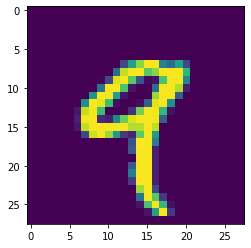

Label of this image is 9


In [ ]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [ ]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [ ]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
#implementing one hot encoding
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [ ]:
#importing the model
from keras.models import Sequential

In [ ]:
#creating model object
model=Sequential()

In [ ]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
#adding layers and forming the model
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [ ]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test),callbacks=[early_stop])

Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0263 - val_accuracy: 0.9916
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.0385 - val_accuracy: 0.9896
Epoch 3/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0257 - val_accuracy: 0.9927
Epoch 4/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0298 - val_accuracy: 0.9910
Epoch 5/5
600/600 [==============================] - 4s 6ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0353 - val_accuracy: 0.9914


In [ ]:
#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0353 - accuracy: 0.9914


([0.0045019639655947685, 0.9983333349227905],
 [0.035312220454216, 0.9914000034332275])

In [ ]:
print(model.metrics_names)
print(model.evaluate(xtest,y_test,verbose=0))

['loss', 'accuracy']
[0.035312220454216, 0.9914000034332275]


In [ ]:
print(model.metrics_names)
print(model.evaluate(xtrain,y_train,verbose=0))

['loss', 'accuracy']
[0.0045019639655947685, 0.9983333349227905]


In [ ]:
my_number = xtest[0]

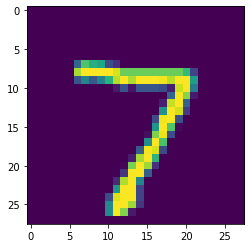

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
model.predict(my_number.reshape(1,28,28,1))

1/1 [==============================] - 0s 15ms/step


array([[5.0584382e-05, 6.8004668e-04, 2.1415849e-07, 3.3159226e-03,
        4.0612422e-02, 1.0907487e-05, 4.4410453e-09, 1.0000000e+00,
        2.5811911e-05, 9.0618825e-01]], dtype=float32)

In [ ]:
predict_x=model.predict(my_number.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 14ms/step


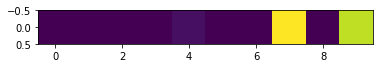

In [ ]:
plt.imshow(predict_x)

In [ ]:
model.save("CNN_MNIST_v1.h5")

In [ ]:
from tensorflow import keras
model = keras.models.load_model('CNN_MNIST_v1.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [ ]:
model_test = xtest[3]

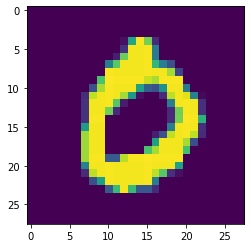

In [ ]:
plt.imshow(model_test.reshape(28,28))

In [ ]:
model.predict(model_test.reshape(1,28,28,1))

1/1 [==============================] - 0s 18ms/step


array([[1.0000000e+00, 3.2288938e-06, 4.2156418e-05, 1.7493179e-05,
        6.7541498e-04, 1.2292576e-04, 6.1876738e-01, 7.0025325e-01,
        1.2708234e-03, 8.6274632e-04]], dtype=float32)

In [ ]:
predictions=model.predict(model_test.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)

1/1 [==============================] - 0s 16ms/step


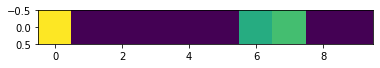

In [ ]:
plt.imshow(predictions)